Name: AVIK MONDAL  
UMID: 11062225  
Physics 510

Problem 1

In [28]:
import numpy as np
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

#necessary libraries

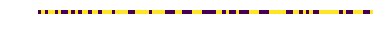

In [18]:
def generateIC(size): # generates initial 1D Ising condition (give tuple)
    X = np.random.randint(0,2,[size[0],size[1]]) # 1D initial condition
    for j in range(len(X[:,0])):
        for i in range(len(X[j,:])):
            if (X[j,i] < 1):
                X[j,i] = -1
            else:
                X[j,i] = 1
    return X

Xinitial = generateIC((1,100))


plt.axis('off')
plt.imshow(Xinitial)


In [ ]:
#
# CALCULATE ONLY THE PERTURBATION - NOT THE ENTIRE HAMILTONIAN EVERY TIME
#
def calculate1DIsingHamiltonian(X):
    H = 0
    for j in range(len(X[0,:])):
        if (j+1 == len(X[0,:])):
            spin1 = X[0,j]
            spin2 = X[0,0]
        else:
            spin1 = X[0,j]
            spin2 = X[0,j+1]
        H-= spin1*spin2
    return H

H = calculate1DIsingHamiltonian(Xinitial)

def calculate2DIsingHamiltonian(X):
    H = 0
    xlen = X.shape[0]
    ylen = X.shape[1]
    for i in range(xlen):
        for j in range(ylen):
            spin_current = X[i,j]
            if (j+1 == ylen):
                spin_right = X[i,0]
            else:
                spin_right = X[i, j+1]
            if (i+1 == xlen):
                spin_down = X[0, j]
            else:
                spin_down = X[i+1,j]
            H -= spin_current *(spin_right + spin_down)
    return H



In [30]:
#runs metrpolis hastings algorithm at a given T, with initial state
# "initial" an "iters" number of times (only works for 1D Ising Model) with
#periodic boundary conditions
def metropolisHastingsIterator(T,initial, iters):
    Xinit = initial
    for index in range(0,iters):
        #pick random lattice site
        Hinit = calculate1DIsingHamiltonian(Xinit) # measure hamiltonian initially
        rando_x = np.random.randint(0, Xinit.shape[0]) 
        rando_y = np.random.randint(0, Xinit.shape[1])
        #generate potential next condition
        #Xnext = np.copy(Xinit)
        #Xnext[rando_x, rando_y] = Xnext[rando_x,rando_y]*-1
        Xinit[rando_x, rando_y] = Xinit[rando_x,rando_y]*-1
        # calculate hamiltonian of next condition
        Htest = calculate1DIsingHamiltonian(Xinit)
        # calculate exponent of partition function (canonical distribution)
        partitionExp = (Htest - Hinit)/T
        #calculate acceptance ratio
        acceptRatio = 0
        if (np.exp(-1*partitionExp) >= 1):
            acceptRatio = 1
        else:
            acceptRatio = np.exp(-1*partitionExp)
        # calculate whether we accept or not
        acceptTestVal = np.random.random(1)
        if (acceptTestVal >= acceptRatio):
            Xinit[rando_x, rando_y] = Xinit[rando_x,rando_y]*-1
        #print(calculate1DIsingHamiltonian(Xinit))
    return Xinit
##runs metrpolis hastings algorithm at a given T, with initial state
# "initial" an "iters" number of times (only works for 2D Ising Model)
# with periodic boundary conditions
def metropolisHastingsIterator2D(T,initial, iters):
    Xinit = initial
    for index in range(0,iters):
        Hinit = calculate2DIsingHamiltonian(Xinit)
        #pick random lattice site
        rando_x = np.random.randint(0, Xinit.shape[0]) 
        rando_y = np.random.randint(0, Xinit.shape[1])
        #generate potential next condition
        #Xnext = np.copy(Xinit)
        Xinit[rando_x, rando_y] = Xinit[rando_x,rando_y]*-1
        # calculate hamiltonian of next condition
        Htest = calculate2DIsingHamiltonian(Xinit)
        
        # calculate exponent of partition function (canonical distribution)
        partitionExp = (Htest - Hinit)/T
        #calculate acceptance ratio
        acceptRatio = 0
        if (np.exp(-1*partitionExp) >= 1):
            acceptRatio = 1
        else:
            acceptRatio = np.exp(-1*partitionExp)
        # calculate whether we accept or not
        acceptTestVal = np.random.random(1)
        if (acceptTestVal >= acceptRatio):
            Xinit[rando_x, rando_y] = Xinit[rando_x,rando_y]*-1
    return Xinit





In [21]:
Xinit = generateIC((1,100))
Xlast = metropolisHastingsIterator(0.1, Xinit, 1000000)

1a) Initial Condition (T = 0.1)

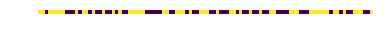

In [23]:
plt.axis('off')
x = plt.imshow(Xinit)
#plt.savefig('ic1_0.1_1d.png')

Iteration 1 (T = 0.1)

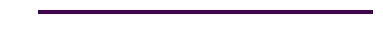

In [24]:
plt.axis('off')
y = plt.imshow(Xlast)
plt.savefig('ic1_0.1_1d_posthastings.png')

New IC

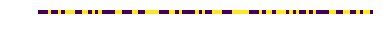

In [25]:
Xinitial = generateIC((1,100)) 
plt.axis('off')
plt.imshow(Xinitial)
plt.savefig('ic2_0.1_1d.png')

Iteration 2 (T = 0.1)

164.6149435043335


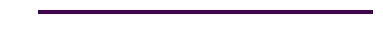

In [29]:
t = time.time()
Xlast2 = metropolisHastingsIterator(0.1, Xinitial, 1000000)
plt.axis('off')
y2 = plt.imshow(Xlast2)
#plt.savefig('ic1_0.1_1d_posthastings2.png')
print(time.time()-t)

new IC

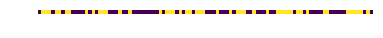

In [65]:
Xinitial = generateIC((1,100)) 
plt.axis('off')
plt.imshow(Xinitial)
plt.savefig('ic3_0.1_1d.png')

Iteration 3 (T = 0.1)

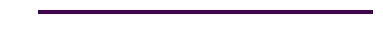

In [28]:
Xlast3 = metropolisHastingsIterator(0.1, Xinitial, 1000000)
plt.axis('off')
plt.imshow(Xlast3)
plt.savefig('ic3_0.1_1d_posthastings.png')

In [29]:
Xinitial1 = generateIC((1,100))
Xinitial2 = generateIC((1,100))
Xinitial3 = generateIC((1,100))
Xlast21 = metropolisHastingsIterator(10, Xinitial1, 1000000)
Xlast22 = metropolisHastingsIterator(10, Xinitial2, 1000000)
Xlast23 = metropolisHastingsIterator(10, Xinitial3, 1000000)

1b) 

IC

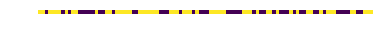

In [66]:
plt.axis('off')
x = plt.imshow(Xinitial1)
plt.savefig('ic3_10_1d.png')

First Iteration

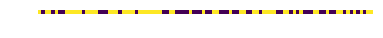

In [70]:
plt.axis('off')
plt.imshow(Xlast21)
plt.savefig('ic3_10_1d_posthastings.png')

IC

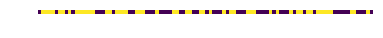

In [68]:
plt.axis('off')
plt.imshow(Xinitial2)
plt.savefig('ic1_10_1d.png')

Second Iteration

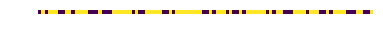

In [71]:
plt.axis('off')
plt.imshow(Xlast22)
plt.savefig('ic1_10_1d_posthastings.png')

IC

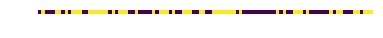

In [72]:
plt.axis('off')
plt.imshow(Xinitial3)
plt.savefig('ic2_10_1d.png')

Third Iteration

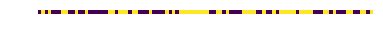

In [73]:
plt.axis('off')
plt.imshow(Xlast23)
plt.savefig('ic2_10_1d_posthastings.png')

Problem 2

2a)

In [31]:
X2d11 = generateIC((50,50))
X2d12 = generateIC((50,50))
X2d13 = generateIC((50,50))

X2d21 = generateIC((50,50))
X2d22 = generateIC((50,50))
X2d23 = generateIC((50,50))

Initial Condition 1 (T = 0.1)

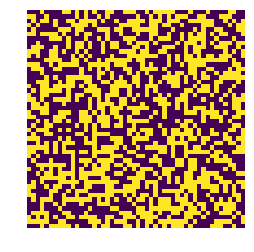

In [74]:
plt.axis('off')
plt.imshow(X2d11)
plt.savefig('ic1_0.1_2d.png')

Initial Condition 2 (T = 0.1)

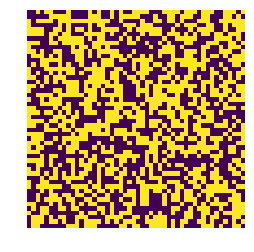

In [77]:
plt.axis('off')
plt.imshow(X2d12)
plt.savefig('ic2_0.1_2d.png')

Initial Condition 3 (T = 0.1)

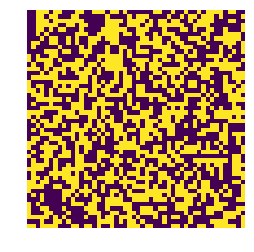

In [78]:
plt.axis('off')
plt.imshow(X2d13)
plt.savefig('ic3_0.1_2d.png')

IC 1 after Metropolis Hastings (T = 0.1)

In [ ]:
t = time.time()
X2dfinal11 = metropolisHastingsIterator2D(0.1, X2d11, 1000000)
plt.axis('off')
plt.imshow(X2dfinal11)
t2 = time.time()
print(t2-t)
#plt.savefig('ic1_0.1_2d_posthastings.png')

IC 2 after Metropolis Hastings (T = 0.1)

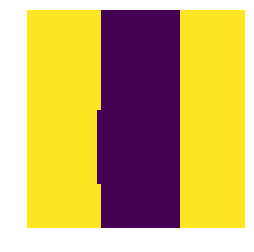

In [80]:
#X2dfinal12 = metropolisHastingsIterator2D(0.1, X2d12, 1000000)
plt.axis('off')
plt.imshow(X2dfinal12)
plt.savefig('ic2_0.1_2d_posthastings.png')

IC 3 after Metropolis Hastings (T = 0.1)

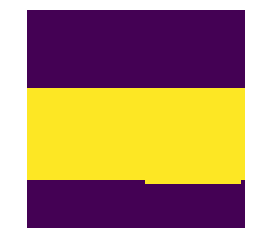

In [82]:
#X2dfinal13 = metropolisHastingsIterator2D(0.1, X2d13, 1000000)
plt.axis('off')
plt.imshow(X2dfinal13)
plt.savefig('ic3_0.1_2d_posthastings.png')

Initial Condition 1 (T = 10)

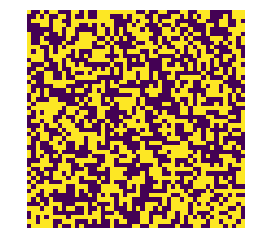

In [83]:
plt.axis('off')
plt.imshow(X2d21)
plt.savefig('ic1_10_2d.png')

IC after Metropolis Hastings (T = 10)

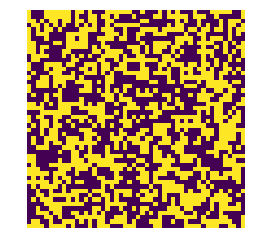

In [84]:
#X2dfinal21 = metropolisHastingsIterator2D(10, X2d21, 1000000)
plt.axis('off')
plt.imshow(X2dfinal21)
plt.savefig('ic1_10_2d_posthastings.png')

Initial Condition 2 (T = 10)

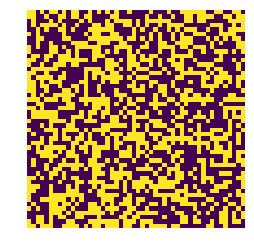

In [85]:
plt.axis('off')
plt.imshow(X2d22)
plt.savefig('ic2_10_2d.png')

IC 2 after Metropolis Hastings (T = 10)

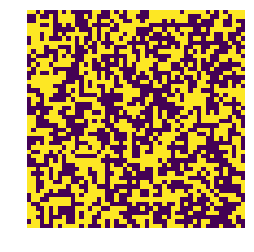

In [86]:
#X2dfinal22 = metropolisHastingsIterator2D(10, X2d22, 1000000)
plt.axis('off')
plt.imshow(X2dfinal22)
plt.savefig('ic2_10_2d_posthastings.png')

Initial Condition 3 (T = 10)

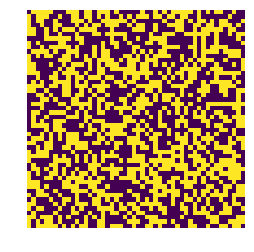

In [87]:
plt.axis('off')
plt.imshow(X2d23)
plt.savefig('ic3_10_2d.png')

IC 3 after Metropolis Hastings (T = 10)

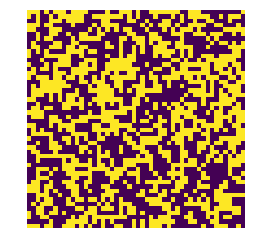

In [88]:
#X2dfinal23 = metropolisHastingsIterator2D(10, X2d23, 1000000)
plt.axis('off')
plt.imshow(X2dfinal23)
plt.savefig('ic3_10_2d_posthastings.png')